<br>
<br>
<br>
<h1><center>Assignment 03</center></h1>
<h2><center>Exploratory Data Analysis</center></h2>
<h4><center>[ISYS2047] Information Systems Solutions and Design</center></h4>
<h3><center>Part 6. Random Forest model classification with selected features</center></h3>
<br>
<div style="text-align: right"><h4>Student name: Juyeon Kim</h4></div>
<div style="text-align: right"><h4>Student ID: S3741327</h4></div>
<br></br>

## Import libraries

In [1]:
# Library for pickling
import joblib

# Library needed for counting categorical values
import collections

# Library for splitting the data into train and test sets
from sklearn.model_selection import train_test_split 

# Model library
from sklearn.ensemble import RandomForestClassifier

# Scaling
from sklearn.preprocessing import StandardScaler

# label encoder
from sklearn.preprocessing import LabelEncoder

# Onehot encoding
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import numpy as np

# Metrics library
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Binary classification using Random Forest

## 1. Load data

In [2]:
loan_df = pd.read_csv("personal-loan.csv")
loan_df.head()

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3815,40.0,9.0,3.0,Graduate,60.0,0,yes,1.7,0,0,yes,no
1,5737,65.0,27.0,4.0,Advanced or Professional,36.0,90,no,0.0,0,0,yes,no
2,4209,61.0,3.0,2.0,Undergraduate,145.0,314,no,0.0,0,1,yes,yes
3,4734,29.0,14.0,1.0,Undergraduate,52.0,0,no,0.0,1,0,yes,no
4,2551,43.0,23.0,4.0,Graduate,33.0,0,no,0.0,0,0,yes,no


In [3]:
# Load the pickled file
loan_df = joblib.load('loan-cleaned.pkl')  

# Check
loan_df.head()

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3815.0,40.0,9.0,3.0,2.0,60.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,5737.0,65.0,27.0,4.0,1.0,36.0,90.0,0.0,0.0,0.0,0.0,1.0,0
2,4209.0,61.0,3.0,2.0,0.0,145.0,0.0,0.0,0.0,0.0,1.0,1.0,1
3,4734.0,29.0,14.0,1.0,0.0,52.0,0.0,0.0,0.0,1.0,0.0,1.0,0
4,2551.0,43.0,23.0,4.0,2.0,33.0,0.0,0.0,0.0,0.0,0.0,1.0,0


## 2. Iterate Data splitting & Data transformation & Model creation  & Performance metrics

> ***Result***
> - feature_cols_lst is consisted of list of features selected by the value of k (the number of features).
> - Each list was driven from 'feature-selection' file. 

> - classification_accuracy is peak at k = 9. 
> - AUC remains the same after peak which means further feature removal is not critical to its accuracy. 

> - When k = 9, 
> classification_accuracy: 0.9
> AUC: 0.77


> - Random FOrest model performs the best when k = 9.
> - (1) credit_card_acct and (2) online_acct shall be dropped. 

In [1]:
# Possible lists of selected features by k.
feature_cols_lst = [
    # when k=11
     [
        'age',
        'yrs_experience', 
        'family_size',
        'education_level', 
        'income', 
        'mortgage_amt', 
        'credit_card_acct',
        'credit_card_spend', 
        'share_trading_acct', 
        'fixed_deposit_acct',
        'online_acct' 
     ],
    # when k=10
     [
        'age',
        'yrs_experience', 
        'family_size',
        'education_level', 
        'income', 
        'mortgage_amt', 
        'credit_card_acct',
        'credit_card_spend', 
        'share_trading_acct', 
        'fixed_deposit_acct',
#         'online_acct'  
     ],
    # when k=9
     [
        'age',
        'yrs_experience', 
        'family_size',
        'education_level', 
        'income', 
        'mortgage_amt', 
#         'credit_card_acct',
        'credit_card_spend', 
        'share_trading_acct', 
        'fixed_deposit_acct',
#         'online_acct' 
     ],
    # when k=8
     [
#         'age',
        'yrs_experience', 
        'family_size',
        'education_level', 
        'income', 
        'mortgage_amt', 
#         'credit_card_acct',
        'credit_card_spend', 
        'share_trading_acct', 
        'fixed_deposit_acct',
#         'online_acct' 
     ],
    # when k=7
     [
#         'age',
        'yrs_experience', 
        'family_size',
        'education_level', 
        'income', 
        'mortgage_amt', 
#         'credit_card_acct',
        'credit_card_spend', 
#         'share_trading_acct', 
        'fixed_deposit_acct',
#         'online_acct' 
     ],  
    # when k=6
     [
#         'age',
        'yrs_experience', 
#         'family_size',
        'education_level', 
        'income', 
        'mortgage_amt', 
#         'credit_card_acct',
        'credit_card_spend', 
#         'share_trading_acct', 
        'fixed_deposit_acct',
#         'online_acct' 
     ],
    # when k=5
     [
#         'age',
        'yrs_experience', 
#         'family_size',
        'education_level', 
        'income', 
        'mortgage_amt', 
#         'credit_card_acct',
#         'credit_card_spend', 
#         'share_trading_acct', 
        'fixed_deposit_acct',
#         'online_acct' 
     ] 
]

In [5]:
def data_modeling(feature_cols):
    
    '''
    Will take a list as an input with the selected features.
    
    This function will perform ...
    - Data splitting 
    - Data transformation
    - Model creation
    - Performance metrics
    
    We created this function to easily iterate the entire data modeling practices. 
    
    '''
    
    print(f"*** k={len(feature_cols)} feature selection started ***")
    # 1. Split cleaned data into training and testing sets
    X = loan_df[feature_cols]
    # print('X:\n', X)

    # Store the labels/target in variable y (lower case as its a single value)
    y = loan_df['personal_loan']
    # print('y:\n', y)

    # Split into train/test set
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size=0.2, # keep 20% for testing
                                                        random_state=2 # pass an int for reproducible result
                                                        )
    
    # 2. Data Transformation
    
    # A. ***Discretization of continuous variables***
    
    if 'mortgage_amt' in X_train.columns.to_list(): # only execute when the column exists

        print(f"Feature Discretization on morgate_amt initiated...")

        # Descriptive analysis on mortgate_amt (excluding value 0)
        def mg_category(df): 
            if df["mortgage_amt"] == 0:
                return "mg_no"

            elif (df["mortgage_amt"] > 0) & (df["mortgage_amt"] <= 97):
                return "mg_low"

            elif (df["mortgage_amt"] > 97) & (df["mortgage_amt"] <= 177):
                return "mg_moderate"

            elif df["mortgage_amt"] > 177:
                return "mg_moderate"

        # Apply the  previously defined function to the training set
        X_train = X_train.copy()
        X_train["mortgage_amt_category"] = \
            X_train.apply(lambda X_train:mg_category(X_train), axis = 1) # axis=1 = row-wise

        # The column "mortgage_amt" is no longer needed and hence can be deleted 
        X_train.drop(['mortgage_amt'], axis=1, inplace=True)

        # Apply the  previously defined function to the testing set
        X_test = X_test.copy()
        X_test["mortgage_amt_category"] = \
            X_test.apply(lambda X_test:mg_category(X_test), axis = 1) # axis=1 = row-wise

        # The column "mortgage_amt" is no longer needed and hence can be deleted 
        X_test.drop(['mortgage_amt'], axis=1, inplace=True)


        print(f"Feature Discretization on morgate_amt finished...")
    
    if 'credit_card_spend' in X_train.columns.to_list(): # only execute when the column exists
    
        print(f"Feature Discretization on credit_card_spend initiated...")
        
        # Define a function to classify credit card spending
        # Pass the whole dataframe as parameter
        # And return a category (a word label but you could also return numeric labels)
        def cs_category(df): 
            if (df["credit_card_spend"] <= 0.3):
                return "cs_low"

            elif (df["credit_card_spend"] > 0.3) & (df["credit_card_spend"] <= 0.7):
                return "cs_medium"

            elif (df["credit_card_spend"] > 0.7) & (df["credit_card_spend"] <= 1):
                return "cs_high"

        # Apply the  previously defined function to the training set
        X_train = X_train.copy()
        X_train["credit_card_spend_category"] = \
            X_train.apply(lambda X_train:cs_category(X_train), axis = 1) # axis=1 = row-wise

        # The column "credit_card_spend" is no longer needed and hence can be deleted 
        X_train.drop(['credit_card_spend'], axis=1, inplace=True)

        # Apply the  previously defined function to the testing set
        X_test = X_test.copy()
        X_test["credit_card_spend_category"] = \
            X_test.apply(lambda X_test:cs_category(X_test), axis = 1) # axis=1 = row-wise

        # The column "credit_card_spend" is no longer needed and hence can be deleted 
        X_test.drop(['credit_card_spend'], axis=1, inplace=True)

        print(f"Feature Discretization on credit_card_spend finished...")
    
    # B. ***OneHot encoding of multi-class categorical variables***
    print(f"OneHot encoding initiated...")
    # 1. Select the columns to one-hot encode
    columns_to_onehot_encode = [
    #     'customer_id', 
    #     'age', 
    #     'yrs_experience', 
    #     'family_size',
    #     'education_level', 
    #     'income', 
    #     'mortgage_amt', # deleted 
    #     'credit_card_acct',
    #     'credit_card_spend', # deleted
    #     'share_trading_acct', 
    #     'fixed_deposit_acct',
    #     'online_acct',
        'mortgage_amt_category',
        'credit_card_spend_category'
    ]

    # 2 Instantiate a one-hot encoder
    enc = LabelBinarizer()

    # 3. Fit the encoder on the training column and transform the training and testing columns
    for col in columns_to_onehot_encode:
        
        if col in X_train.columns.to_list(): # only execute when the column exists
            
            ## Fix X_train
            dummies_df = pd.get_dummies(X_train[col], prefix="bpc") # generate dataframe of dummies
            X_train.drop([col], axis=1, inplace=True) # drop original column
            X_train = pd.concat([X_train, dummies_df], axis=1) # concatenate both dataframes
            ## Fix X_test
            dummies_df = pd.get_dummies(X_test[col], prefix="bpc")
            X_test.drop([col], axis=1, inplace=True)
            X_test = pd.concat([X_test, dummies_df], axis=1)
        
    print(f"OneHot encoding finished...")
    
    # 3.  Create a  Random Forest model
    print(f"Creating RandomForestClassifier model...")
    # Instantiate model and fit on training data
    rf_model = RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'sqrt', max_leaf_nodes= 30, min_samples_leaf= 1).fit(X_train, y_train)

    # Predict using test data
    y_pred = rf_model.predict(X_test)

    # 4. Performance metrics
    # Compare the actual (true) labels or categories with the predited ones
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred[0:25])
    

    classification_accuracy = accuracy_score(y_test, y_pred)
    print(f"classification_accuracy: {classification_accuracy}")
    
    # Confusion matrix start
    cf_matrix = confusion_matrix(y_test, y_pred)
    # print(f"confusion matrix:\n {cf_matrix}") #\n means new line i.e. next line

    # Visualise the confusion matrix as a Seaborn Heatmap
    sns.heatmap(cf_matrix, annot=True, fmt="d", yticklabels=False, cmap="YlGnBu")

    # Classification report
    print(classification_report(y_test,y_pred))
    
    # AUC
    fpr, tpr, thresholds = roc_curve(y_test,y_pred)

    # Call the auc() function to calculate the area under the curve
    # Need to pass the false positive rates (fpr) and true positive rates as parameters to the function
    roc_auc = auc(fpr,tpr)
    print(f'AUC: {roc_auc:0.2f}') # float 2 places of decimal

    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='lower right')
    plt.grid()
    #plt.show()

    # 4. Pickling
    
    print(f'Pickling initiated...')
    
    # Pickle the model for later evaluation
    joblib.dump(rf_model, 'model-random-forest.pkl')  # Use the right model name and a suitable file name

    joblib.dump(X_train, 'X_train-rf.pkl') 
    joblib.dump(X_test, 'X_test-rf.pkl') 
    joblib.dump(y_train, 'y_train-rf.pkl') 
    joblib.dump(y_test, 'y_test-rf.pkl')

    print(f'Pickling finished...')
    
    return X_train
    
    print("="*50)

*** k=11 feature selection started ***
Feature Discretization on morgate_amt initiated...
Feature Discretization on morgate_amt finished...
Feature Discretization on credit_card_spend initiated...
Feature Discretization on credit_card_spend finished...
OneHot encoding initiated...
OneHot encoding finished...
Creating RandomForestClassifier model...
True: [0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1]
Pred: [0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]
classification_accuracy: 0.9008333333333334
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1006
           1       0.81      0.51      0.62       194

    accuracy                           0.90      1200
   macro avg       0.86      0.74      0.78      1200
weighted avg       0.89      0.90      0.89      1200

AUC: 0.74
Pickling initiated...
Pickling finished...
*** k=10 feature selection started ***
Feature Discretization on morgate_amt initiated...
Feature Discretizat

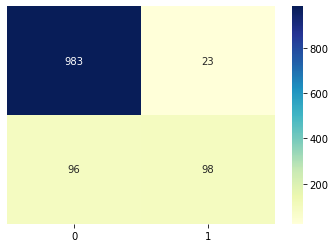

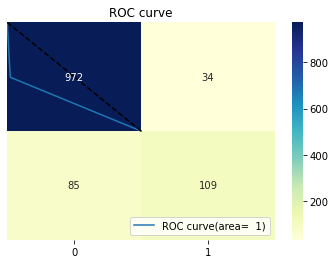

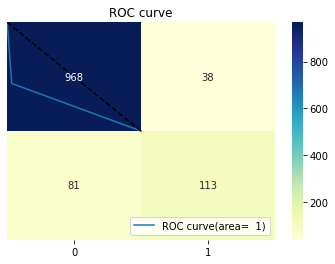

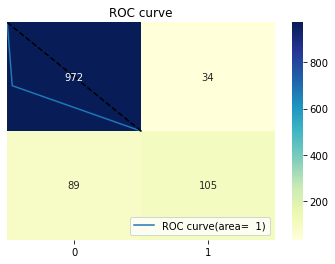

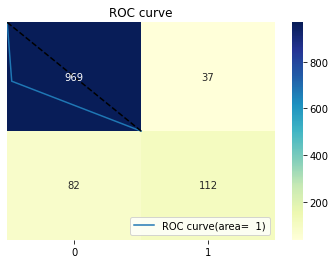

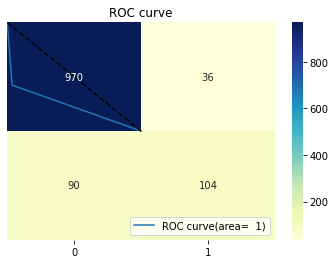

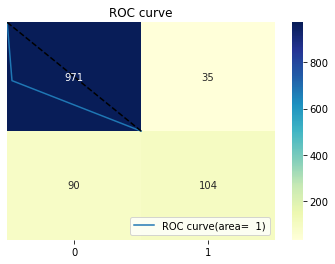

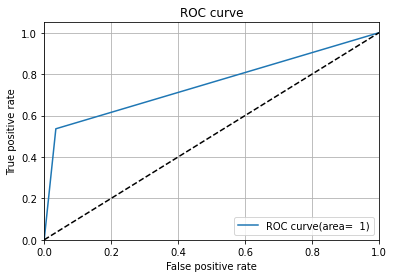

In [6]:
# loop the various list of selected features
for feature_cols in feature_cols_lst:
    data_modeling(feature_cols)

## 3. Finalize Feature selection & Pickling

In [7]:
# feature lists when k = 9
feature_cols_final = feature_cols_lst[2]
feature_cols_final

['age',
 'yrs_experience',
 'family_size',
 'education_level',
 'income',
 'mortgage_amt',
 'credit_card_spend',
 'share_trading_acct',
 'fixed_deposit_acct']

*** k=9 feature selection started ***
Feature Discretization on morgate_amt initiated...
Feature Discretization on morgate_amt finished...
Feature Discretization on credit_card_spend initiated...
Feature Discretization on credit_card_spend finished...
OneHot encoding initiated...
OneHot encoding finished...
Creating RandomForestClassifier model...
True: [0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1]
Pred: [0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1]
classification_accuracy: 0.9025
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1006
           1       0.77      0.57      0.65       194

    accuracy                           0.90      1200
   macro avg       0.84      0.77      0.80      1200
weighted avg       0.90      0.90      0.90      1200

AUC: 0.77
Pickling initiated...
Pickling finished...


,age,yrs_experience,family_size,education_level,income,share_trading_acct,fixed_deposit_acct,bpc_mg_low,bpc_mg_moderate,bpc_mg_no,bpc_cs_high,bpc_cs_low,bpc_cs_medium
2973,63.0,11.0,1.0,0.0,19.0,0.0,0.0,0,0,1,0,1,0
2774,35.0,39.0,4.0,0.0,144.0,0.0,0.0,0,0,1,0,1,0
3281,34.0,38.0,2.0,1.0,55.0,0.0,0.0,0,0,1,0,1,0
2512,62.0,12.0,1.0,0.0,94.0,0.0,0.0,0,0,1,0,1,0
457,57.0,32.0,4.0,2.0,70.0,0.0,0.0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,39.0,30.0,4.0,2.0,165.0,0.0,0.0,0,1,0,0,1,0
2514,44.0,36.0,4.0,0.0,94.0,0.0,0.0,0,1,0,0,1,0
3606,57.0,21.0,3.0,2.0,180.0,0.0,0.0,0,0,1,0,1,0
5704,45.0,16.0,4.0,2.0,65.0,0.0,0.0,0,0,1,0,1,0


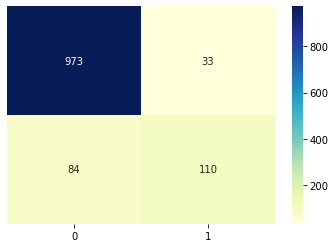

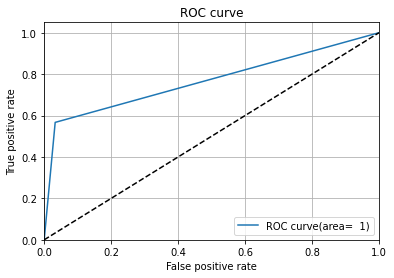

In [8]:
data_modeling(feature_cols_final)

## 5. Summary of Hyper parameter tuning

> - This practice was performed by running 'tune-params.ipynb' file. 
> - Accuracy before and after tuning were recorded below. 

Best params: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'max_leaf_nodes': 30, 'min_samples_leaf': 1}, score: 0.70

Accuracy before tuning: 0.8991666666666667 <br>
Accuracy after tuning: 0.9033333333333333